<a href="https://colab.research.google.com/github/tejuthomass/Data-Science-Transformers-for-Natural-Language-Processing/blob/main/Beginner's%20Corner/TextClassificationPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.4 MB/s eta 0:00:00


In [2]:
from transformers import pipeline

import numpy as np
import pandas as pd
# import seaborn as sn
# import torch

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score

In [3]:
analyzer = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [4]:
type(analyzer)

transformers.pipelines.text_classification.TextClassificationPipeline

In [5]:
analyzer('This is such a great movie!')

[{'label': 'POSITIVE', 'score': 0.9998759031295776}]

In [6]:
analyzer('This show was not interesting')

[{'label': 'NEGATIVE', 'score': 0.9997871518135071}]

In [7]:
analyzer(['This show was interesting',
          'This show was not bad at all',
          'I can\'t say that this was a good movie'])

[{'label': 'POSITIVE', 'score': 0.999747097492218},
 {'label': 'POSITIVE', 'score': 0.998742401599884},
 {'label': 'NEGATIVE', 'score': 0.9278441071510315}]

In [8]:
analyzer(['This course is just what I needed.',
          'I can\'t understand any of this. Instructor kept telling me to meet the prerequisites.\
          What are prerequisites? Why does he keep saying that?'])

[{'label': 'POSITIVE', 'score': 0.9991594552993774},
 {'label': 'NEGATIVE', 'score': 0.9966675639152527}]

In [9]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-08-15 12:54:08--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.07s   

2023-08-15 12:54:09 (46.9 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [10]:
df = pd.read_csv('AirlineTweets.csv')

In [11]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
df = df[['airline_sentiment', 'text']]

<Axes: >

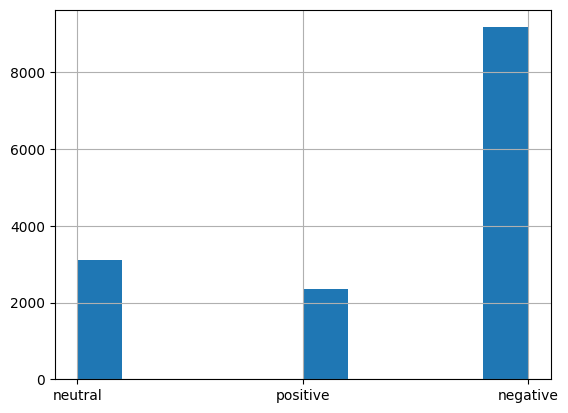

In [13]:
df['airline_sentiment'].hist()

In [14]:
df = df[df['airline_sentiment'] != 'neutral']

In [15]:
df['target'] = df.airline_sentiment.map({'negative': 0, 'positive': 1})

In [16]:
predictions = analyzer(df.text.to_list())

In [17]:
probs = [d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions]

In [18]:
preds = np.array([1 if d['label'].startswith('P') else 0 for d in predictions])

In [19]:
print('acc:', np.mean(df['target'] == preds))

acc: 0.8898708950697514


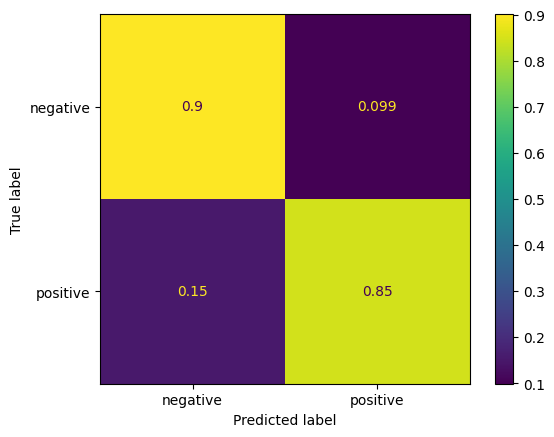

In [20]:
cm = confusion_matrix(df['target'], preds, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=['negative', 'positive']).plot()

In [21]:
f1_score(df['target'], preds)

0.7587777566900741

In [22]:
f1_score(1 - df['target'], 1 - preds)

0.928647616908999

In [23]:
roc_auc_score(df['target'], probs)

0.9485935612834128

In [24]:
roc_auc_score(1 - df['target'], 1 - np.array(probs))

0.9485935612834127